# Swarmalators Scalability Sound Analaysis

In [2]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform_and_spectrogram(sound_samples, sr):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(sound_samples, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(left=0)
    plt.show()

    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(librosa.stft(sound_samples), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

def plot_waveform_and_spectrogram_zones(sound_samples, sr, split_zones=0):
    
    def draw_zone(zone_width, height, line_color):
        for i in range(1, split_zones + 1):
            if i < split_zones:
                plt.axvline(x=i * zone_width, color=line_color)
            plt.text(zone_width * (i - 0.5), height, chr(97 + i - 1), color=line_color)
    
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(sound_samples, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.xlim(left=0)

    if split_zones >= 2:
        zone_width = (len(sound_samples) / split_zones) / sr
        draw_zone(zone_width, np.min(sound_samples), 'red')

    plt.show()

    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(librosa.stft(sound_samples), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    if split_zones >= 2:
        #zone_width was calculated in the previous plot
        draw_zone(zone_width, 8200, 'cyan')

    plt.show()

In [3]:
#Use librosa and load an audio file place at "C:\Users\pitte\Documents\Recordings\Swarmalators1\swarmalators_freq_map.wav", 
# create an dictionary where the key is a number starting by 3, then every next element to add in that dic will have the key 
# as teh next integer (e.g. after 3, 4, 5, 6, ans so on), the value of every element in the dictionary is an array of 5 values, 
# each value of the array is a section of 10 seconds of the wav file as an object loaded by librosa.load. That is, 
# the first 10 seconds (0-10) is the first element of the array corresponding to teh key 3, then teh next segment (10-20) 
# is the second , and so on, it means that the 5 elements finish at 50 sec, then the next key 4 will have teh first array 
# as 50-60 and so on until the whole wav is represented by this dictionary

import librosa

audio_file = "C:\\Users\\pitte\\Documents\\Recordings\\Swarmalators1\\swarmalators_freq_map.wav"
segment_duration = 10  # Duration of each segment in seconds
num_segments = 5  # Number of segments for each key

audio_data, sr = librosa.load(audio_file, sr = 44100)

segments_per_key = round((len(audio_data) / (segment_duration * num_segments)) / sr)

audio_dict = {}
start_time = 0

for i in range(3, 3 + segments_per_key):
    audio_dict[i] = []
    for j in range(num_segments):
        start_index = int(start_time * sr)
        end_index = int((start_time + segment_duration) * sr)
        segment = audio_data[start_index:end_index]
        audio_dict[i].append(segment)
        start_time += segment_duration    

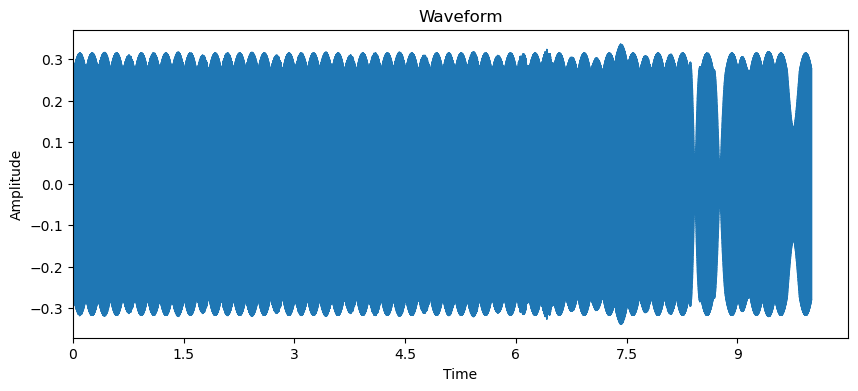

C:\Users\pitte\AppData\Local\Temp\ipykernel_27364\3292624940.py:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sound_samples), ref=np.max)


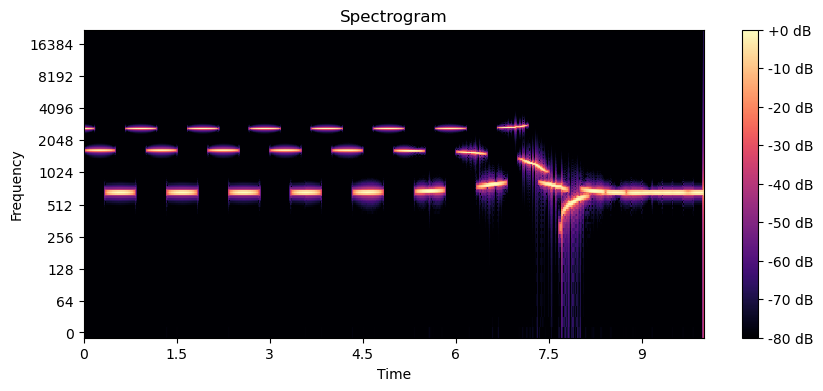

In [4]:
agent_3_state_1 = audio_dict[3][0]
plot_waveform_and_spectrogram(agent_3_state_1, sr)

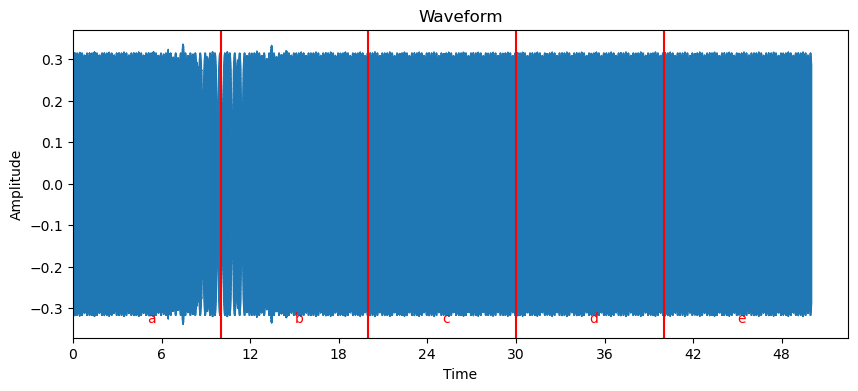

C:\Users\pitte\AppData\Local\Temp\ipykernel_27364\3292624940.py:45: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(sound_samples), ref=np.max)


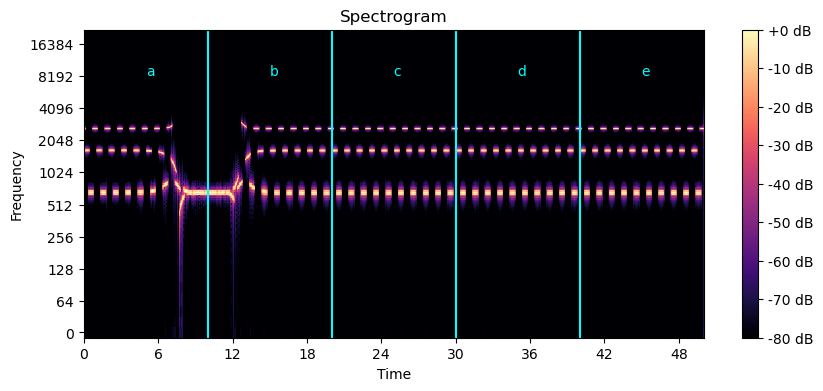

In [5]:
agent_3 = np.concatenate(audio_dict[3])
plot_waveform_and_spectrogram_zones(agent_3, sr, split_zones=5)
#plot_waveform_and_spectrogram_zones(audio_data, sr, split_zones=5)
